In [1]:
import matplotlib.pyplot as plt
import SQL_example as sqllib
import numpy as np
from scipy.ndimage import gaussian_filter
import dataproc
import basic_functions

In [2]:
#show the distribution of specified transmode

([1, 2, 3, 4], [1, 2, 1, 0])


Labelled data from device #312 on 20240106 successfully loaded.
1415 lines of data loaded in total.
Format: [Time, Date, SVM_mean, SVM_min, SVM_max, SVM_SD]



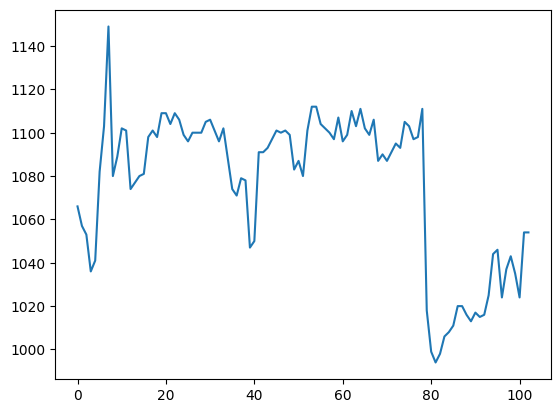

In [10]:
d = sqllib.loadLabelledData('312', '20240106')
ppl = [x[2] for x in d if x[-1] == 1]
plt.plot(range(0, len(ppl)), ppl)


Labelled data from device #312 on 20240101 successfully loaded.
1378 lines of data loaded in total.
Format: [Time, Date, SVM_mean, SVM_min, SVM_max, SVM_SD]


Labelled data from device #312 on 20240106 successfully loaded.
1415 lines of data loaded in total.
Format: [Time, Date, SVM_mean, SVM_min, SVM_max, SVM_SD]

[1066.0, 1057.0, 1053.0, 1036.0, 1041.0, 1082.0, 1103.0, 1149.0, 1080.0, 1089.0, 1102.0, 1101.0, 1074.0, 1077.0, 1080.0, 1081.0, 1098.0, 1101.0, 1098.0, 1109.0, 1109.0, 1104.0, 1109.0, 1106.0, 1099.0, 1096.0, 1100.0, 1100.0, 1100.0, 1105.0, 1106.0, 1101.0, 1096.0, 1102.0, 1088.0, 1074.0, 1071.0, 1079.0, 1078.0, 1047.0, 1050.0, 1091.0, 1091.0, 1093.0, 1097.0, 1101.0, 1100.0, 1101.0, 1099.0, 1083.0, 1087.0, 1080.0, 1101.0, 1112.0, 1112.0, 1104.0, 1102.0, 1100.0, 1097.0, 1107.0, 1096.0, 1099.0, 1110.0, 1103.0, 1111.0, 1102.0, 1099.0, 1106.0, 1087.0, 1090.0, 1087.0, 1091.0, 1095.0, 1093.0, 1105.0, 1103.0, 1097.0, 1098.0, 1111.0, 1018.0, 999.0, 994.0, 998.0, 1006.0, 1008.0, 1011

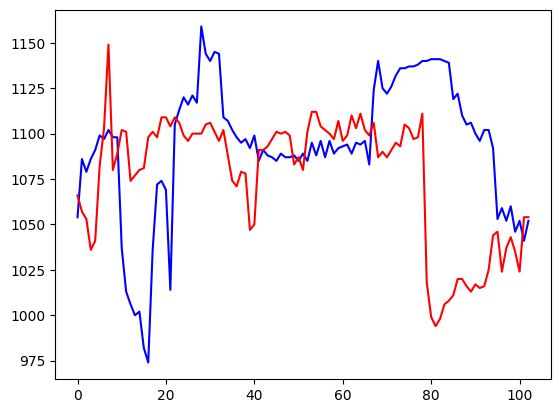

In [12]:
d1 = sqllib.loadLabelledData('312', '20240101')
d2 = sqllib.loadLabelledData('312', '20240106')
l1 = [x[2] for x in d1 if x[-1] == 1]
l2 = [x[2] for x in d2 if x[-1] == 1]

l = min(len(l1), len(l2))
print(l2)
plt.plot(range(0, l), l1[:l], color='blue', label='Line 1')
plt.plot(range(0, l), l2[:l], color='red', label='Line 2')


Labelled data from device #312 on 20240101 successfully loaded.
1378 lines of data loaded in total.
Format: [Time, Date, SVM_mean, SVM_min, SVM_max, SVM_SD]


Labelled data from device #312 on 20240106 successfully loaded.
1415 lines of data loaded in total.
Format: [Time, Date, SVM_mean, SVM_min, SVM_max, SVM_SD]

[-9.0, -4.0, -17.0, 5.0, 41.0, 21.0, 46.0, -69.0, 9.0, 13.0, -1.0, -27.0, 3.0, 3.0, 1.0, 17.0, 3.0, -3.0, 11.0, 0.0, -5.0, 5.0, -3.0, -7.0, -3.0, 4.0, 0.0, 0.0, 5.0, 1.0, -5.0, -5.0, 6.0, -14.0, -14.0, -3.0, 8.0, -1.0, -31.0, 3.0, 41.0, 0.0, 2.0, 4.0, 4.0, -1.0, 1.0, -2.0, -16.0, 4.0, -7.0, 21.0, 11.0, 0.0, -8.0, -2.0, -2.0, -3.0, 10.0, -11.0, 3.0, 11.0, -7.0, 8.0, -9.0, -3.0, 7.0, -19.0, 3.0, -3.0, 4.0, 4.0, -2.0, 12.0, -2.0, -6.0, 1.0, 13.0, -93.0, -19.0, -5.0, 4.0, 8.0, 2.0, 3.0, 9.0, 0.0, -4.0, -3.0, 4.0, -2.0, 1.0, 9.0, 19.0, 2.0, -22.0, 13.0, 6.0, -8.0, -11.0, 30.0, 0.0, 1054.0]


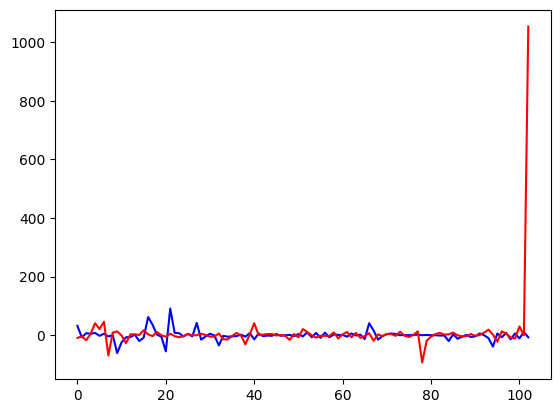

In [15]:
d1 = sqllib.loadLabelledData('312', '20240101')
d2 = sqllib.loadLabelledData('312', '20240106')
l1 = [x[2] for x in d1 if x[-1] == 1]
l2 = [x[2] for x in d2 if x[-1] == 1]
for i in range(0, len(l1)-1):
    l1[i] = l1[i + 1] - l1[i]
for i in range(0, len(l2)-1):
    l2[i] = l2[i + 1] - l2[i]
l1.remove(l1[-1])
l2.remove(l2[-1])

l = min(len(l1), len(l2))
print(l2)
plt.plot(range(0, l), l1[:l], color='blue', label='Line 1')
plt.plot(range(0, l), l2[:l], color='red', label='Line 2')


Calibrated data from device #312 on 20240101 successfully loaded.
1055 lines of data loaded in total.
Format: [Time, Date, SVM_mean, SVM_min, SVM_max, SVM_SD]


Calibrated data from device #312 on 20240106 successfully loaded.
1377 lines of data loaded in total.
Format: [Time, Date, SVM_mean, SVM_min, SVM_max, SVM_SD]

[-64.23044140030447, -73.10631659056321, -76.98219178082195, -93.85806697108069, -88.73394216133943, -47.36156773211587, -26.237442922374612, 19.88668188736665, -48.98919330289209, -39.86506849315083, -26.74094368340957, -27.616818873668308, -53.74794520547948, -50.62382039573822, -47.49969558599696, -46.3755707762557, -29.25144596651444, -26.127321156773178, -29.003196347032144, -17.879071537290883, -17.754946727549623, -22.630821917808362, -17.5066971080671, -20.38257229832584, -27.25844748858458, -30.13432267884332, -26.010197869102058, -25.886073059360797, -25.761948249619536, -20.637823439878275, -19.513698630137014, -24.389573820395754, -29.265449010654493, -23.14

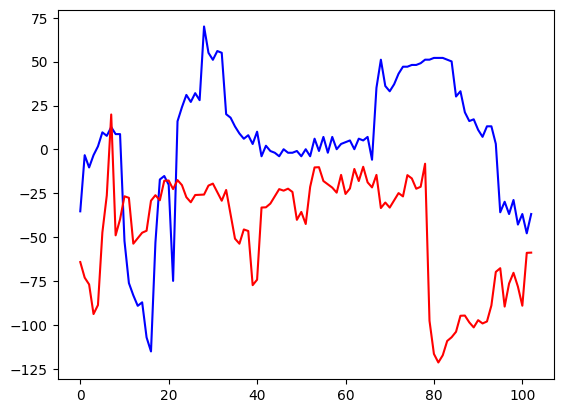

In [13]:
d1 = sqllib.loadCaliData('312', '20240101')
d2 = sqllib.loadCaliData('312', '20240106')
l1 = [x[2] for x in d1 if x[-1] == 1]
l2 = [x[2] for x in d2 if x[-1] == 1]

l = min(len(l1), len(l2))
print(l2)
plt.plot(range(0, l), l1[:l], color='blue', label='Line 1')
plt.plot(range(0, l), l2[:l], color='red', label='Line 2')


Calibrated data from device #312 on 20240101 successfully loaded.
1055 lines of data loaded in total.
Format: [Time, Date, SVM_mean, SVM_min, SVM_max, SVM_SD]


Calibrated data from device #312 on 20240106 successfully loaded.
1377 lines of data loaded in total.
Format: [Time, Date, SVM_mean, SVM_min, SVM_max, SVM_SD]

[-8.87587519025874, -3.875875190258739, -16.87587519025874, 5.124124809741261, 41.372374429223555, 21.12412480974126, 46.12412480974126, -68.87587519025874, 9.12412480974126, 13.12412480974126, -0.8758751902587392, -26.131126331811174, 3.124124809741261, 3.124124809741261, 1.1241248097412608, 17.12412480974126, 3.124124809741261, -2.8758751902589665, 11.12412480974126, 0.12412480974126083, -4.875875190258739, 5.124124809741261, -2.875875190258739, -6.875875190258739, -2.875875190258739, 4.124124809741261, 0.12412480974126083, 0.12412480974126083, 5.124124809741261, 1.1241248097412608, -4.875875190258739, -4.875875190258739, 6.124124809741261, -13.87587519025874, -13.875

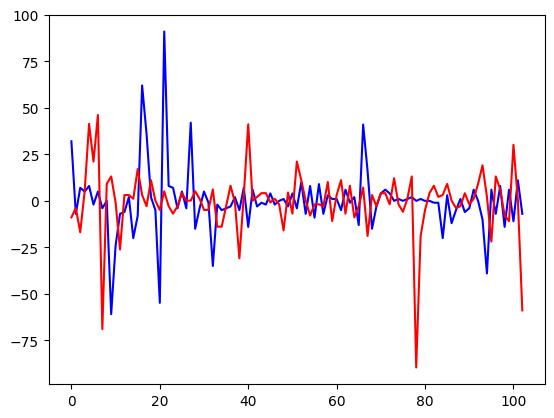

In [14]:
d1 = sqllib.loadCaliData('312', '20240101')
d2 = sqllib.loadCaliData('312', '20240106')
l1 = [x[2] for x in d1 if x[-1] == 1]
l2 = [x[2] for x in d2 if x[-1] == 1]
for i in range(0, len(l1)-1):
    l1[i] = l1[i + 1] - l1[i]
for i in range(0, len(l2)-1):
    l2[i] = l2[i + 1] - l2[i]


l = min(len(l1), len(l2))
print(l2)
plt.plot(range(0, l), l1[:l], color='blue', label='Line 1')
plt.plot(range(0, l), l2[:l], color='red', label='Line 2')


Calibrated data from device #312 on 20240101 successfully loaded.
1055 lines of data loaded in total.
Format: [Time, Date, SVM_mean, SVM_min, SVM_max, SVM_SD]



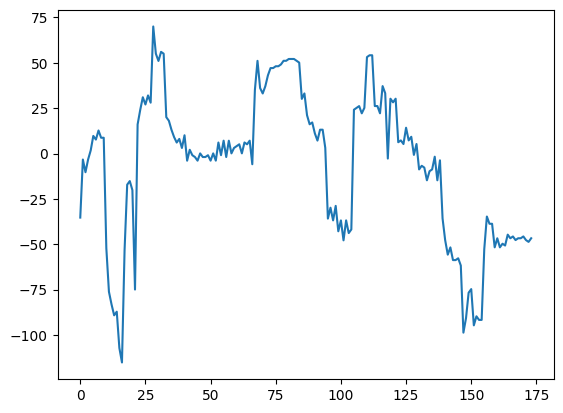

In [10]:
ddd = sqllib.loadCaliData('312', '20240101')
pl = [x[2] for x in ddd if x[-1] == 1]
plt.plot(range(0, len(pl)), pl)

In [1]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

# 创建数据集
X = [[x[4] - x[3]] for x in d]

# 使用 KMeans 进行聚类
kmeans = KMeans(n_clusters=1)
kmeans.fit(X)

# 计算每个样本到最近聚类中心的距离
distances = pairwise_distances_argmin_min(X, kmeans.cluster_centers_)[1]

# 设置离群值的阈值（例如，距离的百分位数）
threshold = 20

# 标记离群值
outliers = [X[i] for i, distance in enumerate(distances) if distance > threshold]

print("离群值：", outliers)

NameError: name 'd' is not defined

In [2]:
date_1 = '20240101'
date_2 = '20240102'

date1 = '20240306'
date2 = '20240307'
date3 = '20240308'
date4 = '20240309'
serial = '312'

ldata1 = sqllib.loadLabelledData(serial, date1)
ldata2 = sqllib.loadLabelledData(serial, date2)
ldata3 = sqllib.loadLabelledData(serial, date3)
ldata4 = sqllib.loadLabelledData(serial, date4)

ldata_1 = sqllib.loadLabelledData(serial, date_1)
ldata_2 = sqllib.loadLabelledData(serial, date_2)


Labelled data from device #312 on 20240306 successfully loaded.
1439 lines of data loaded in total.
Format: [Time, Date, SVM_mean, SVM_min, SVM_max, SVM_SD]


Labelled data from device #312 on 20240307 successfully loaded.
1441 lines of data loaded in total.
Format: [Time, Date, SVM_mean, SVM_min, SVM_max, SVM_SD]


Labelled data from device #312 on 20240308 successfully loaded.
1439 lines of data loaded in total.
Format: [Time, Date, SVM_mean, SVM_min, SVM_max, SVM_SD]


Labelled data from device #312 on 20240309 successfully loaded.
1441 lines of data loaded in total.
Format: [Time, Date, SVM_mean, SVM_min, SVM_max, SVM_SD]


Labelled data from device #312 on 20240101 successfully loaded.
1378 lines of data loaded in total.
Format: [Time, Date, SVM_mean, SVM_min, SVM_max, SVM_SD]


Labelled data from device #312 on 20240102 successfully loaded.
1440 lines of data loaded in total.
Format: [Time, Date, SVM_mean, SVM_min, SVM_max, SVM_SD]



In [9]:
d1 = [[], [], [], []]
d2 = [[], [], [], []]
d3 = [[], [], [], []]
d4 = [[], [], [], []]

for i in range(min([len(ldata1), len(ldata2), len(ldata3), len(ldata4)])):
    if ldata1[i][-1] != -1:
        d1[0].append(ldata1[i][0])
        d1[1].append(ldata1[i][2])
        d1[2].append(ldata1[i][3])
        d1[3].append(ldata1[i][4])
    if ldata2[i][-1] != -1:
        d2[0].append(ldata2[i][0])
        d2[1].append(ldata2[i][2])
        d2[2].append(ldata2[i][3])
        d2[3].append(ldata2[i][4])
    if ldata3[i][-1] != -1:
        d3[0].append(ldata3[i][0])
        d3[1].append(ldata3[i][2])
        d3[2].append(ldata3[i][3])
        d3[3].append(ldata3[i][4])
    if ldata4[i][-1] != -1:
        d4[0].append(ldata4[i][0])
        d4[1].append(ldata4[i][2])
        d4[2].append(ldata4[i][3])
        d4[3].append(ldata4[i][4])

d_1 = [[], [], [], []]
d_2 = [[], [], [], []]
for i in range(len(ldata_1)):
    if ldata_1[i][-1] == 0:
        d_1[0].append(ldata_1[i][0])
        d_1[1].append(ldata_1[i][2])
        d_1[2].append(ldata_1[i][3])
        d_1[3].append(ldata_1[i][4])
for i in range(len(ldata_1)):
    if ldata_2[i][-1] == 0:
        d_2[0].append(ldata_2[i][0])
        d_2[1].append(ldata_2[i][2])
        d_2[2].append(ldata_2[i][3])
        d_2[3].append(ldata_2[i][4])

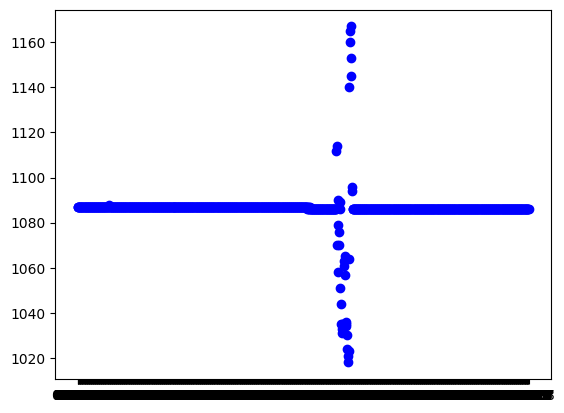

In [11]:
#plt.scatter(d_1[0], d_1[1], color='blue', label='Line 1')
plt.scatter(d_2[0], d_2[1], color='blue', label='Line 1')
#plt.plot(x, max, color='green', label='Line 2')
#plt.plot(x, mean, color='red', label='Line 3')

In [7]:
from scipy import stats

target = [x[4] - x[3] for x in d]

# 执行Shapiro-Wilk检验
statistic, p_value = stats.shapiro(target)

# 输出检验结果
print("Shapiro-Wilk检验结果：")
print(f"统计量：{statistic}")
print(f"p值：{p_value}")
if p_value < 0.05:
    print('Non-normal')
else:
    print('Normal')

# 先去除离群值，再检查是否符合正态分布
    
# 如果用线性回归呢？


Shapiro-Wilk检验结果：
统计量：0.6429910651130719
p值：1.3875072314202122e-47
Non-normal


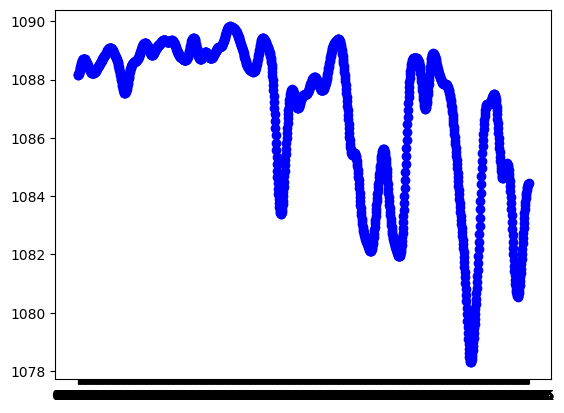

In [7]:
sigma = 10.0
gau_mean1 = gaussian_filter(d1[2], sigma)
plt.scatter(d1[0], gau_mean1, color='blue', label='Line 1')

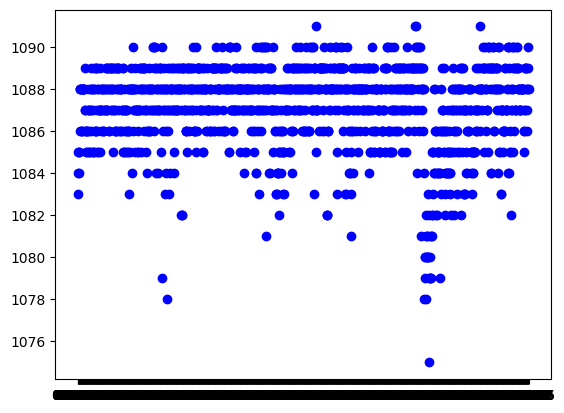

In [7]:
plt.scatter(d2[0], d2[2], color='blue', label='Line 1')
#plt.plot(x, max, color='green', label='Line 2')
#plt.plot(x, mean, color='red', label='Line 3')

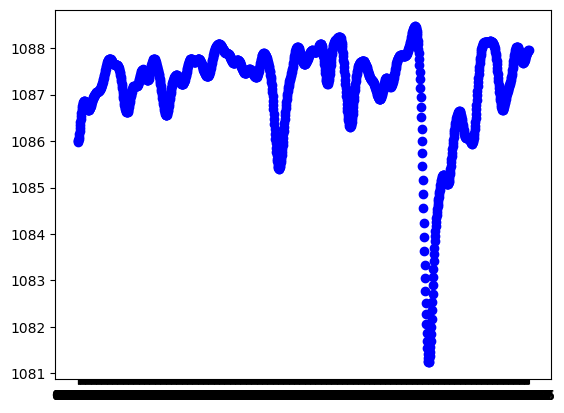

In [9]:
sigma = 10.0
gau_mean2 = gaussian_filter(d2[2], sigma)
plt.scatter(d2[0], gau_mean2, color='blue', label='Line 1')

In [8]:
import numpy as np

def kalman_filter(measurements, initial_mean, initial_covariance, process_noise, measurement_noise):
    # 初始化状态向量和协方差矩阵
    mean = initial_mean
    covariance = initial_covariance

    filtered_means = []
    filtered_covariances = []

    for measurement in measurements:
        # 预测步骤
        predicted_mean = mean
        predicted_covariance = covariance + process_noise

        # 更新步骤
        measurement_residual = measurement - predicted_mean
        measurement_residual_covariance = predicted_covariance + measurement_noise
        kalman_gain = predicted_covariance / measurement_residual_covariance
        mean = predicted_mean + kalman_gain * measurement_residual
        covariance = (1 - kalman_gain) * predicted_covariance

        filtered_means.append(mean)
        filtered_covariances.append(covariance)

    return filtered_means, filtered_covariances

# 测试示例
measurements = [1.2, 1.7, 2.4, 2.8]  # 测量序列
initial_mean = 0  # 初始状态均值
initial_covariance = 1  # 初始状态协方差
process_noise = 0.1  # 过程噪声方差
measurement_noise = 0.2  # 测量噪声方差

filtered_means, filtered_covariances = kalman_filter(measurements, initial_mean, initial_covariance, process_noise, measurement_noise)

# 打印输出结果
for mean, covariance in zip(filtered_means, filtered_covariances):
    print(f"Mean: {mean}, Covariance: {covariance}")

Mean: 1.0153846153846153, Covariance: 0.16923076923076924
Mean: 1.4081967213114752, Covariance: 0.11475409836065577
Mean: 1.9217391304347826, Covariance: 0.10355731225296445
Mean: 2.3647404505386875, Covariance: 0.10088148873653283


In [ ]:
from collections import Counter

def most_common_elements(lst):
    counter = Counter(lst)
    most_common = counter.most_common(1)
    return most_common[0][0] if most_common else None

# 示例列表
my_list = [1, 2, 3, 2, 4, 5, 2, 4, 2]

# 返回重复次数最高的元素
result = most_common_elements(my_list)

print(result)  # 输出: 2